In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import Image
import sys, os
scr_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(scr_dir)

from preprocess_tf import data_pipe
import tensorflow as tf

In [2]:
ROOT_PATH = 'C://Users/gilbe/Documents/aifi-bootcamp'
"""
df = pd.read_csv(f'{ROOT_PATH}/data/aapl.csv')
"""

df = pd.read_csv(f'{ROOT_PATH}/data/closing_prices.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
print(df.head())

# df.index.rename('Date', inplace=True)
# df.rename(columns={'Unnamed: 0', 'Date'}, inplace=True)
df.head()

                 AAPL  ABBV        ABT       AMGN    AMZN       AVGO  \
date                                                                   
2010-01-04  27.294495   NaN  21.129273  49.792737  133.90  16.673423   
2010-01-05  27.341684   NaN  20.958563  49.365427  134.69  16.797192   
2010-01-06  26.906778   NaN  21.074956  48.994453  132.25  16.929801   
2010-01-07  26.857038   NaN  21.249546  48.545833  130.00  16.823714   
2010-01-08  27.035592   NaN  21.358180  48.977198  133.52  16.947483   

                   BA        BAC        BMY          C  ...        PFE  \
date                                                    ...              
2010-01-04  45.640616  14.639460  19.648366  32.843185  ...  13.934719   
2010-01-05  47.135432  15.115313  19.341720  34.098954  ...  13.735967   
2010-01-06  48.565255  15.292591  19.334054  35.161528  ...  13.691800   
2010-01-07  50.531263  15.796435  19.349386  35.258126  ...  13.640272   
2010-01-08  50.043823  15.656478  19.027407  34.678

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.294495,NaN,21.129273,49.792737,133.90,16.673423,45.640616,14.639460,19.648366,32.843185,...,13.934719,47.114847,34.709530,18.323770,27.878733,20.694802,20.828887,22.385830,43.935552,53.998112
2010-01-05,27.341684,NaN,20.958563,49.365427,134.69,16.797192,47.135432,15.115313,19.341720,34.098954,...,13.735967,47.130264,34.407096,18.234010,27.834524,20.457660,20.566022,23.000375,43.498060,54.208950
2010-01-06,26.906778,NaN,21.074956,48.994453,132.25,16.929801,48.565255,15.292591,19.334054,35.161528,...,13.691800,46.906716,34.407096,17.971143,28.108625,20.182950,20.274994,23.033151,43.400840,54.677481
2010-01-07,26.857038,NaN,21.249546,48.545833,130.00,16.823714,50.531263,15.796435,19.349386,35.258126,...,13.640272,46.652332,34.836130,17.769366,29.187345,20.370786,20.154309,23.868932,43.425145,54.505686
2010-01-08,27.035592,NaN,21.358180,48.977198,133.52,16.947483,50.043823,15.656478,19.027407,34.678540,...,13.750689,46.590664,34.646230,17.639188,28.913244,20.427137,20.167013,23.647696,43.206399,54.287039


In [3]:
df.head()

,AAPL,ABBV,ABT,AMGN,AMZN,AVGO,BA,BAC,BMY,C,...,PFE,PG,PM,T,UNH,V,VZ,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.294495,NaN,21.129273,49.792737,133.90,16.673423,45.640616,14.639460,19.648366,32.843185,...,13.934719,47.114847,34.709530,18.323770,27.878733,20.694802,20.828887,22.385830,43.935552,53.998112
2010-01-05,27.341684,NaN,20.958563,49.365427,134.69,16.797192,47.135432,15.115313,19.341720,34.098954,...,13.735967,47.130264,34.407096,18.234010,27.834524,20.457660,20.566022,23.000375,43.498060,54.208950
2010-01-06,26.906778,NaN,21.074956,48.994453,132.25,16.929801,48.565255,15.292591,19.334054,35.161528,...,13.691800,46.906716,34.407096,17.971143,28.108625,20.182950,20.274994,23.033151,43.400840,54.677481
2010-01-07,26.857038,NaN,21.249546,48.545833,130.00,16.823714,50.531263,15.796435,19.349386,35.258126,...,13.640272,46.652332,34.836130,17.769366,29.187345,20.370786,20.154309,23.868932,43.425145,54.505686
2010-01-08,27.035592,NaN,21.358180,48.977198,133.52,16.947483,50.043823,15.656478,19.027407,34.678540,...,13.750689,46.590664,34.646230,17.639188,28.913244,20.427137,20.167013,23.647696,43.206399,54.287039


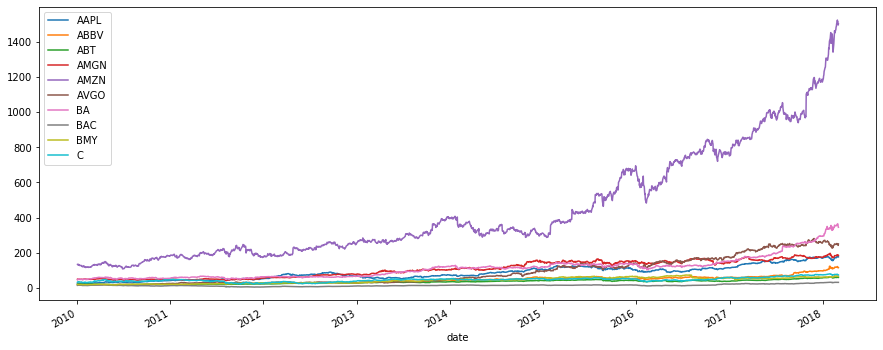

In [7]:
df.iloc[:, :10].plot(figsize=(15, 6));

# Recurent Neural Networks (RNN)
Recurrent Neural Networks take the time dimension into accout by introducing a recursive connection with a time delay of -1. Keras implements RNN with the class called SimpleRNN.

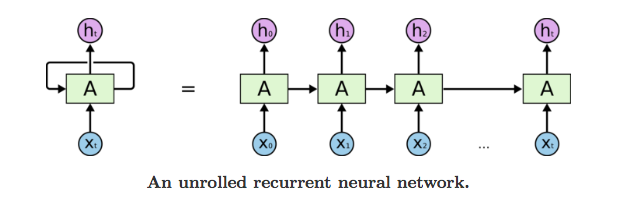

In [8]:
Image(filename="figures/rnn.png")

### Preprocess data
Train model on 10 stocks.

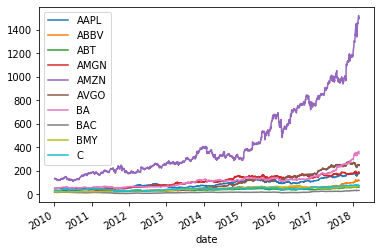

In [9]:
df = df.iloc[:, :10]
df.plot();

## RNN

In [10]:
def two_layered_rnn(
    units=20, 
    input_shape=1, 
    output_shape=1, 
    learning_rate=0.01
):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.SimpleRNN(
        units,
        return_sequences=True,
        input_shape=[None, input_shape])
             )
    
    model.add(tf.keras.layers.SimpleRNN(units))
    model.add(tf.keras.layers.Dense(output_shape))
    
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss=tf.keras.losses.Huber(),
        metrics=['mae', 'mse'])
    
    return model

In [11]:
def training_loop(model):
    metrics_df = pd.DataFrame()

    optim_param_dict = {}

    for c in df.columns:
        optim_param = pd.DataFrame()
        if df.loc[:, c].isnull().sum()/len(df) < 0.5:
            df.loc[:, c].plot(title=f'{c}');
            plt.show();
            print(c)
            print(df[c].shape)
            
            first_valid = df.loc[:, c].first_valid_index()
            
            data_dict = data_pipe(
                df.loc[first_valid:, c].values.reshape(-1, 1), 
                use_tf_data=False,
                use_transformer=True
            )

            xtrain, ytrain, xval, yval, xtest, ytest = (
                data_dict['xtrain'], data_dict['ytrain'], 
                data_dict['xval'], data_dict['yval'],  
                data_dict['xtest'], data_dict['ytest']
            )

            num_outputs = ytrain.shape[-1]
            hyper_lstm = None
            model = None
            model = two_layered_rnn()

            history = model.fit(xtrain,
                            ytrain,
                            batch_size=128,
                            epochs=20,
                            validation_data=(xval, yval),
                            verbose=1)
            
            pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
            plt.gca().set_ylim(0, 500)
            plt.show();

            print('#' * 50)




# Training of RNN

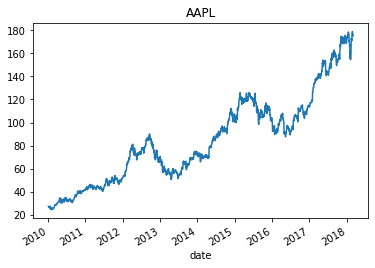

AAPL
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 4s 2ms/sample - loss: 64.6289 - mae: 65.1289 - mse: 4978.7856 - val_loss: 97.7228 - val_mae: 98.2228 - val_mse: 9761.1846
Epoch 2/20
1511/1511 [==============================] - 1s 355us/sample - loss: 60.4154 - mae: 60.9154 - mse: 4447.6328 - val_loss: 94.7984 - val_mae: 95.2984 - val_mse: 9195.2549
Epoch 3/20
1511/1511 [==============================] - 0s 330us/sample - loss: 57.6699 - mae: 58.1699 - mse: 4116.6226 - val_loss: 92.1809 - val_mae: 92.6809 - val_mse: 8703.2246
Epoch 4/20
1511/1511 [==============================] - 1s 344us/sample - loss: 55.0908 - mae: 55.5908 - mse: 3828.3215 - val_loss: 89.6325 - val_mae: 90.1325 - val_mse: 8237.3457
Epoch 5/20
1511/1511 [==============================] - 1s 345us/sample - loss: 52.5530 - mae: 53.0530 - mse: 3550.6372 - val_loss: 87.1036 - val_mae: 87.6036 - val_mse: 7787.8613
Epoch 6/20
1511/1511 [====================

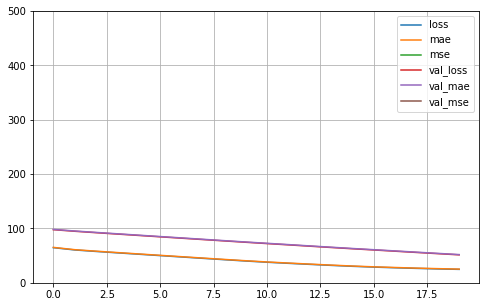

##################################################


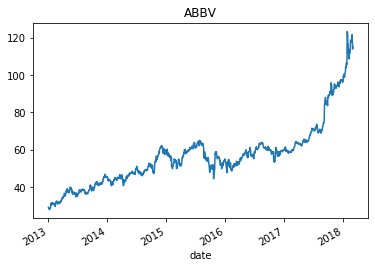

ABBV
(2055,)
Train on 945 samples, validate on 133 samples
Epoch 1/20
945/945 [==============================] - 3s 3ms/sample - loss: 45.0503 - mae: 45.5503 - mse: 2154.8938 - val_loss: 55.1450 - val_mae: 55.6450 - val_mse: 3109.4287
Epoch 2/20
945/945 [==============================] - 0s 383us/sample - loss: 41.0749 - mae: 41.5749 - mse: 1804.2548 - val_loss: 52.9823 - val_mae: 53.4823 - val_mse: 2873.4307
Epoch 3/20
945/945 [==============================] - 0s 356us/sample - loss: 39.0747 - mae: 39.5747 - mse: 1642.3706 - val_loss: 51.1386 - val_mae: 51.6386 - val_mse: 2679.6243
Epoch 4/20
945/945 [==============================] - 0s 378us/sample - loss: 37.2769 - mae: 37.7769 - mse: 1502.7211 - val_loss: 49.3916 - val_mae: 49.8916 - val_mse: 2502.2476
Epoch 5/20
945/945 [==============================] - 0s 394us/sample - loss: 35.5474 - mae: 36.0474 - mse: 1374.9341 - val_loss: 47.6823 - val_mae: 48.1823 - val_mse: 2334.6143
Epoch 6/20
945/945 [==============================] -

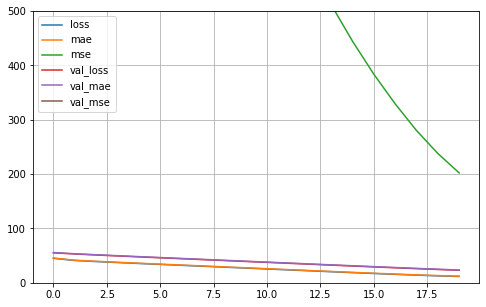

##################################################


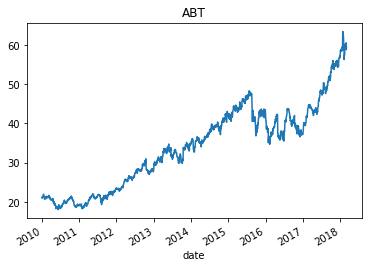

ABT
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 23.9668 - mae: 24.4668 - mse: 679.4150 - val_loss: 30.2114 - val_mae: 30.7114 - val_mse: 948.1619
Epoch 2/20
1511/1511 [==============================] - 1s 350us/sample - loss: 19.7422 - mae: 20.2422 - mse: 486.9022 - val_loss: 27.3044 - val_mae: 27.8044 - val_mse: 778.0557
Epoch 3/20
1511/1511 [==============================] - 0s 330us/sample - loss: 17.0023 - mae: 17.5023 - mse: 382.1389 - val_loss: 24.6892 - val_mae: 25.1892 - val_mse: 639.4673
Epoch 4/20
1511/1511 [==============================] - 1s 357us/sample - loss: 14.4243 - mae: 14.9243 - mse: 300.3653 - val_loss: 22.1415 - val_mae: 22.6415 - val_mse: 517.6091
Epoch 5/20
1511/1511 [==============================] - 1s 375us/sample - loss: 11.9201 - mae: 12.4099 - mse: 230.4894 - val_loss: 19.6943 - val_mae: 20.1943 - val_mse: 412.7810
Epoch 6/20
1511/1511 [==============================]

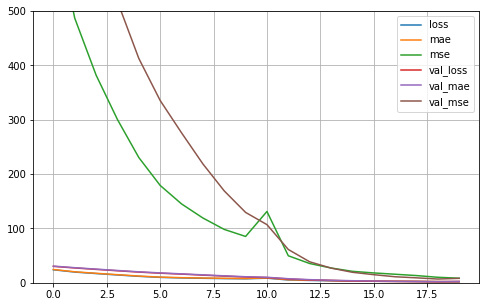

##################################################


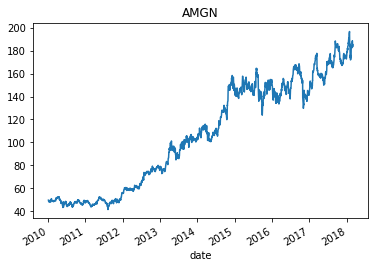

AMGN
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 84.1033 - mae: 84.6033 - mse: 8623.1328 - val_loss: 144.0930 - val_mae: 144.5930 - val_mse: 20997.4531
Epoch 2/20
1511/1511 [==============================] - 1s 361us/sample - loss: 79.8621 - mae: 80.3622 - mse: 7923.9604 - val_loss: 141.2268 - val_mae: 141.7267 - val_mse: 20176.7832
Epoch 3/20
1511/1511 [==============================] - 1s 359us/sample - loss: 77.1449 - mae: 77.6449 - mse: 7489.7026 - val_loss: 138.6202 - val_mae: 139.1202 - val_mse: 19444.7578
Epoch 4/20
1511/1511 [==============================] - 1s 369us/sample - loss: 74.5722 - mae: 75.0722 - mse: 7104.4414 - val_loss: 136.0752 - val_mae: 136.5752 - val_mse: 18743.0938
Epoch 5/20
1511/1511 [==============================] - 1s 370us/sample - loss: 72.0365 - mae: 72.5365 - mse: 6726.8696 - val_loss: 133.5474 - val_mae: 134.0474 - val_mse: 18059.0293
Epoch 6/20
1511/1511 [=====

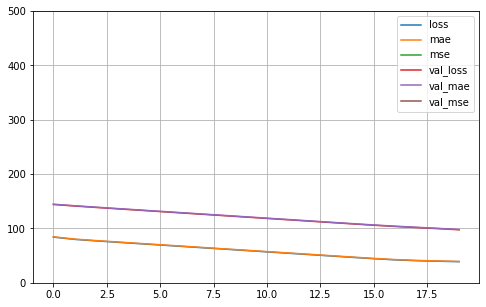

##################################################


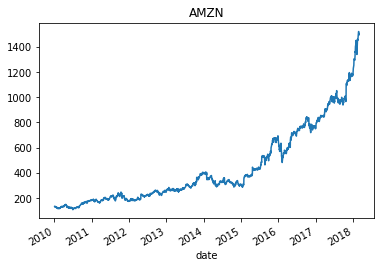

AMZN
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 281.2820 - mae: 281.7820 - mse: 95452.3125 - val_loss: 745.2347 - val_mae: 745.7347 - val_mse: 559941.3750
Epoch 2/20
1511/1511 [==============================] - 1s 357us/sample - loss: 276.4545 - mae: 276.9545 - mse: 92757.7109 - val_loss: 742.2375 - val_mae: 742.7375 - val_mse: 555479.8125
Epoch 3/20
1511/1511 [==============================] - 1s 353us/sample - loss: 273.6731 - mae: 274.1731 - mse: 91209.8359 - val_loss: 739.6042 - val_mae: 740.1042 - val_mse: 551575.1875
Epoch 4/20
1511/1511 [==============================] - 1s 400us/sample - loss: 271.0851 - mae: 271.5851 - mse: 89821.2578 - val_loss: 737.0511 - val_mae: 737.5511 - val_mse: 547802.3125
Epoch 5/20
1511/1511 [==============================] - 1s 353us/sample - loss: 268.5444 - mae: 269.0444 - mse: 88439.5859 - val_loss: 734.5204 - val_mae: 735.0204 - val_mse: 544075.7500
Epoch 6

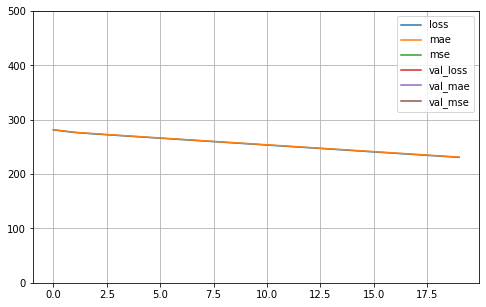

##################################################


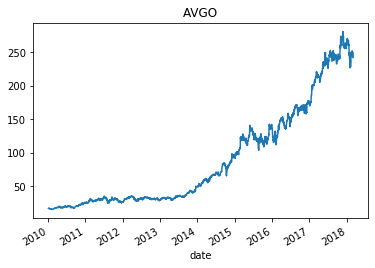

AVGO
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 46.9735 - mae: 47.4735 - mse: 3574.8809 - val_loss: 155.1808 - val_mae: 155.6808 - val_mse: 24501.4453
Epoch 2/20
1511/1511 [==============================] - 1s 343us/sample - loss: 42.3780 - mae: 42.8780 - mse: 3168.9404 - val_loss: 151.6869 - val_mae: 152.1869 - val_mse: 23425.3848
Epoch 3/20
1511/1511 [==============================] - 0s 328us/sample - loss: 39.3993 - mae: 39.8993 - mse: 2917.0811 - val_loss: 149.0115 - val_mae: 149.5115 - val_mse: 22618.1719
Epoch 4/20
1511/1511 [==============================] - 1s 339us/sample - loss: 36.7938 - mae: 37.2927 - mse: 2722.6938 - val_loss: 146.4554 - val_mae: 146.9554 - val_mse: 21860.3633
Epoch 5/20
1511/1511 [==============================] - 1s 336us/sample - loss: 34.3820 - mae: 34.8710 - mse: 2540.1506 - val_loss: 144.0579 - val_mae: 144.5579 - val_mse: 21161.4375
Epoch 6/20
1511/1511 [=====

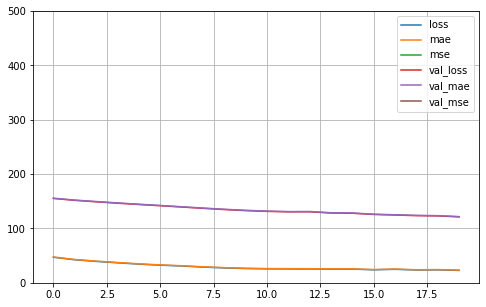

##################################################


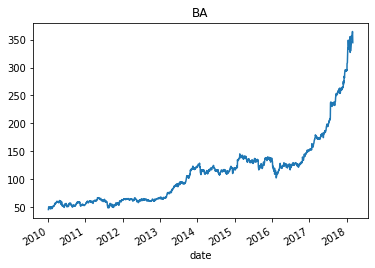

BA
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 81.0448 - mae: 81.5448 - mse: 7608.1792 - val_loss: 125.0746 - val_mae: 125.5746 - val_mse: 15958.4277
Epoch 2/20
1511/1511 [==============================] - 1s 332us/sample - loss: 76.4217 - mae: 76.9217 - mse: 6869.9429 - val_loss: 122.1851 - val_mae: 122.6851 - val_mse: 15241.0859
Epoch 3/20
1511/1511 [==============================] - 1s 342us/sample - loss: 73.6945 - mae: 74.1945 - mse: 6454.2080 - val_loss: 119.5744 - val_mae: 120.0744 - val_mse: 14607.2949
Epoch 4/20
1511/1511 [==============================] - 1s 340us/sample - loss: 71.1193 - mae: 71.6193 - mse: 6084.6841 - val_loss: 117.0276 - val_mae: 117.5276 - val_mse: 14002.1826
Epoch 5/20
1511/1511 [==============================] - 1s 365us/sample - loss: 68.5825 - mae: 69.0825 - mse: 5724.8979 - val_loss: 114.4991 - val_mae: 114.9991 - val_mse: 13414.2354
Epoch 6/20
1511/1511 [=======

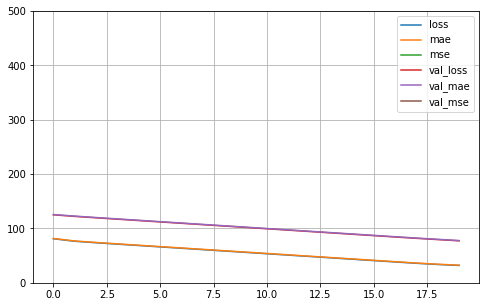

##################################################


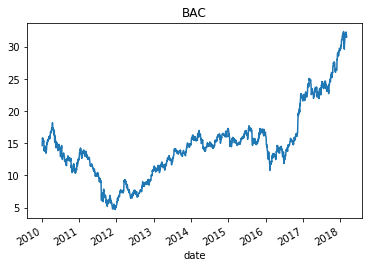

BAC
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 7.9185 - mae: 8.4124 - mse: 86.0519 - val_loss: 9.4292 - val_mae: 9.9292 - val_mse: 112.0893
Epoch 2/20
1511/1511 [==============================] - 1s 386us/sample - loss: 4.3461 - mae: 4.8280 - mse: 30.6538 - val_loss: 6.6397 - val_mae: 7.1397 - val_mse: 64.4783
Epoch 3/20
1511/1511 [==============================] - 1s 446us/sample - loss: 3.0372 - mae: 3.5182 - mse: 15.7976 - val_loss: 4.7083 - val_mae: 5.2069 - val_mse: 40.6170
Epoch 4/20
1511/1511 [==============================] - 1s 424us/sample - loss: 2.4920 - mae: 2.9624 - mse: 11.9876 - val_loss: 3.6419 - val_mae: 4.1060 - val_mse: 30.1987
Epoch 5/20
1511/1511 [==============================] - 1s 398us/sample - loss: 2.3690 - mae: 2.8358 - mse: 11.9094 - val_loss: 3.2323 - val_mae: 3.6836 - val_mse: 26.3823
Epoch 6/20
1511/1511 [==============================] - 1s 399us/sample - loss: 3.

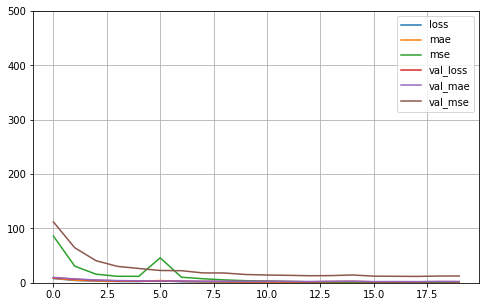

##################################################


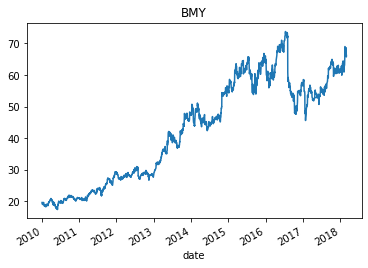

BMY
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 32.5492 - mae: 33.0492 - mse: 1306.4059 - val_loss: 51.0585 - val_mae: 51.5585 - val_mse: 2725.1570
Epoch 2/20
1511/1511 [==============================] - 1s 362us/sample - loss: 27.5219 - mae: 28.0219 - mse: 1000.1905 - val_loss: 47.8900 - val_mae: 48.3900 - val_mse: 2408.3701
Epoch 3/20
1511/1511 [==============================] - 1s 358us/sample - loss: 24.6564 - mae: 25.1564 - mse: 845.6247 - val_loss: 45.2265 - val_mae: 45.7265 - val_mse: 2157.6685
Epoch 4/20
1511/1511 [==============================] - 1s 370us/sample - loss: 22.0473 - mae: 22.5473 - mse: 724.1635 - val_loss: 42.6623 - val_mae: 43.1623 - val_mse: 1929.7291
Epoch 5/20
1511/1511 [==============================] - 1s 359us/sample - loss: 19.5030 - mae: 20.0016 - mse: 614.5098 - val_loss: 40.1361 - val_mae: 40.6361 - val_mse: 1718.0381
Epoch 6/20
1511/1511 [========================

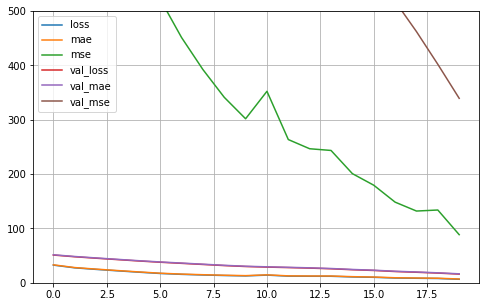

##################################################


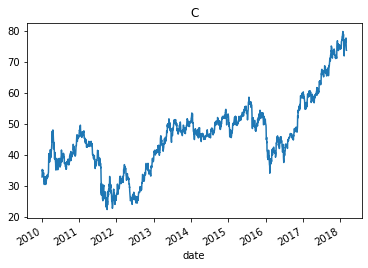

C
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 36.7309 - mae: 37.2309 - mse: 1464.1838 - val_loss: 39.9355 - val_mae: 40.4355 - val_mse: 1674.7112
Epoch 2/20
1511/1511 [==============================] - 1s 378us/sample - loss: 32.4616 - mae: 32.9616 - mse: 1159.7676 - val_loss: 37.0208 - val_mae: 37.5208 - val_mse: 1447.5000
Epoch 3/20
1511/1511 [==============================] - 1s 363us/sample - loss: 29.7159 - mae: 30.2159 - mse: 985.5288 - val_loss: 34.4004 - val_mae: 34.9004 - val_mse: 1257.7260
Epoch 4/20
1511/1511 [==============================] - 1s 371us/sample - loss: 27.1345 - mae: 27.6345 - mse: 837.2507 - val_loss: 31.8504 - val_mae: 32.3504 - val_mse: 1086.2374
Epoch 5/20
1511/1511 [==============================] - 1s 378us/sample - loss: 24.5956 - mae: 25.0956 - mse: 702.8585 - val_loss: 29.3207 - val_mae: 29.8207 - val_mse: 928.9645
Epoch 6/20
1511/1511 [===========================

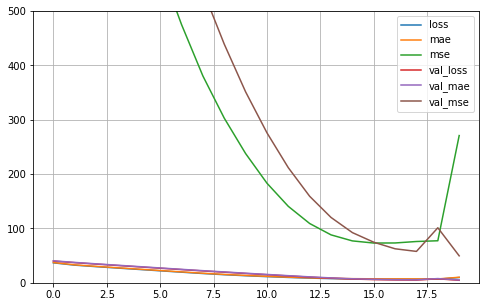

##################################################


In [12]:
model = two_layered_rnn()
training_loop(model)

## Gated Recurrent Networks

RNNs suffer from exploding or vanishing gradients. RNNs can have a hard time to learn long term dependencies.

**Solutions**:
* Exploding gradients can be addressed by gradient clipping
* Vanishing gradients can be addressed by gater recurrent units



**Examples of gated recurrent units**:
* Long Short Term Memory Networks (LSTM)
* Gated Recurrent Unit (GRU)

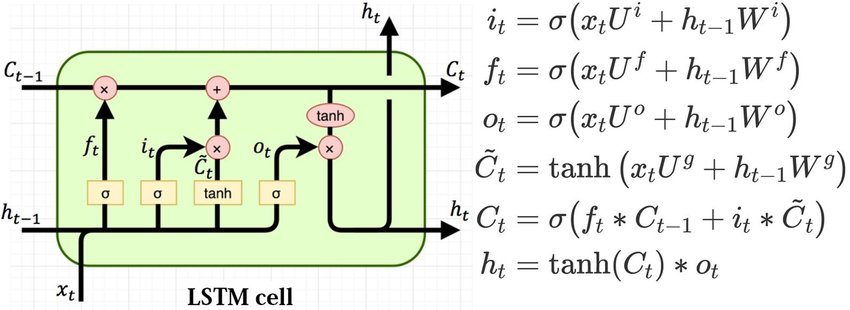

In [13]:
Image(filename="figures/lstm.jpg")

In [14]:
def two_layered_lstm(units=20, input_shape=1, output_shape=1, learning_rate=0.01):
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.LSTM(
        units,
        return_sequences=True,
        input_shape=[None, input_shape])
             )
    
    model.add(tf.keras.layers.LSTM(units))
    model.add(tf.keras.layers.Dense(output_shape))
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
        loss=tf.keras.losses.Huber(),
        metrics=['mae', 'mse'])
    
    return model

## Training of LSTM

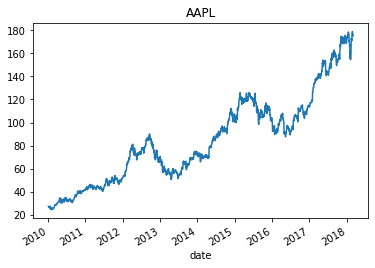

AAPL
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 63.8458 - mae: 64.3458 - mse: 4876.0332 - val_loss: 97.1322 - val_mae: 97.6322 - val_mse: 9645.5186
Epoch 2/20
1511/1511 [==============================] - 1s 343us/sample - loss: 59.8837 - mae: 60.3837 - mse: 4383.0874 - val_loss: 94.3045 - val_mae: 94.8045 - val_mse: 9101.3604
Epoch 3/20
1511/1511 [==============================] - 1s 335us/sample - loss: 57.1861 - mae: 57.6861 - mse: 4060.5784 - val_loss: 91.7046 - val_mae: 92.2046 - val_mse: 8615.1621
Epoch 4/20
1511/1511 [==============================] - 0s 331us/sample - loss: 54.6171 - mae: 55.1171 - mse: 3775.8679 - val_loss: 89.1607 - val_mae: 89.6607 - val_mse: 8152.5186
Epoch 5/20
1511/1511 [==============================] - 1s 341us/sample - loss: 52.0819 - mae: 52.5819 - mse: 3500.8730 - val_loss: 86.6330 - val_mae: 87.1330 - val_mse: 7705.6372
Epoch 6/20
1511/1511 [====================

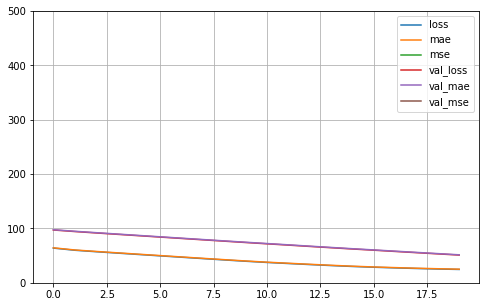

##################################################


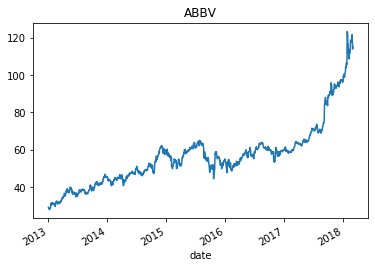

ABBV
(2055,)
Train on 945 samples, validate on 133 samples
Epoch 1/20
945/945 [==============================] - 3s 3ms/sample - loss: 45.8356 - mae: 46.3356 - mse: 2228.0708 - val_loss: 55.5960 - val_mae: 56.0960 - val_mse: 3159.8354
Epoch 2/20
945/945 [==============================] - 0s 383us/sample - loss: 41.4761 - mae: 41.9761 - mse: 1837.8081 - val_loss: 53.3039 - val_mae: 53.8039 - val_mse: 2907.9353
Epoch 3/20
945/945 [==============================] - 0s 369us/sample - loss: 39.3681 - mae: 39.8681 - mse: 1665.7100 - val_loss: 51.4063 - val_mae: 51.9063 - val_mse: 2707.3354
Epoch 4/20
945/945 [==============================] - 0s 359us/sample - loss: 37.5368 - mae: 38.0368 - mse: 1522.4291 - val_loss: 49.6434 - val_mae: 50.1434 - val_mse: 2527.4346
Epoch 5/20
945/945 [==============================] - 0s 364us/sample - loss: 35.7961 - mae: 36.2961 - mse: 1392.9271 - val_loss: 47.9277 - val_mae: 48.4277 - val_mse: 2358.3145
Epoch 6/20
945/945 [==============================] -

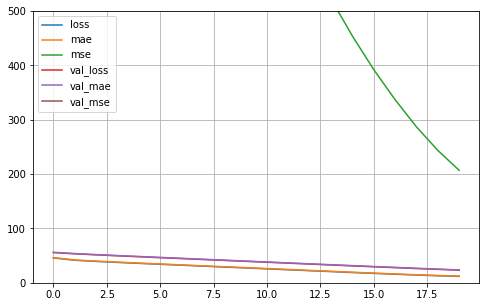

##################################################


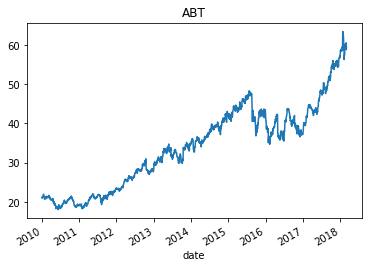

ABT
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 23.4178 - mae: 23.9178 - mse: 651.8812 - val_loss: 29.9707 - val_mae: 30.4707 - val_mse: 933.4333
Epoch 2/20
1511/1511 [==============================] - 1s 337us/sample - loss: 19.5583 - mae: 20.0583 - mse: 479.4680 - val_loss: 27.1636 - val_mae: 27.6636 - val_mse: 770.2479
Epoch 3/20
1511/1511 [==============================] - 1s 343us/sample - loss: 16.8729 - mae: 17.3729 - mse: 377.6348 - val_loss: 24.5698 - val_mae: 25.0698 - val_mse: 633.4657
Epoch 4/20
1511/1511 [==============================] - 1s 336us/sample - loss: 14.3080 - mae: 14.8080 - mse: 296.9074 - val_loss: 22.0282 - val_mae: 22.5282 - val_mse: 512.4939
Epoch 5/20
1511/1511 [==============================] - 1s 336us/sample - loss: 11.8159 - mae: 12.3043 - mse: 227.7986 - val_loss: 19.5963 - val_mae: 20.0963 - val_mse: 408.8362
Epoch 6/20
1511/1511 [==============================]

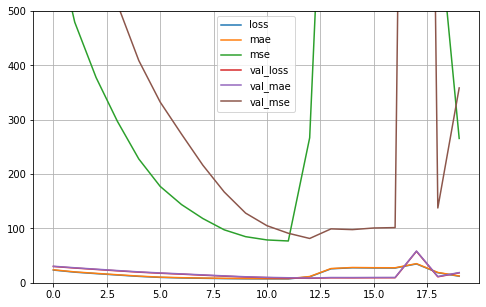

##################################################


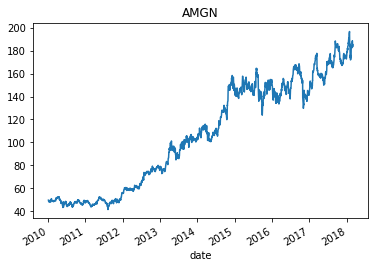

AMGN
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 2s 2ms/sample - loss: 84.5922 - mae: 85.0922 - mse: 8684.9150 - val_loss: 143.2521 - val_mae: 143.7521 - val_mse: 20755.0098
Epoch 2/20
1511/1511 [==============================] - 1s 339us/sample - loss: 78.9069 - mae: 79.4069 - mse: 7770.9961 - val_loss: 140.1842 - val_mae: 140.6842 - val_mse: 19882.3633
Epoch 3/20
1511/1511 [==============================] - 1s 349us/sample - loss: 76.0767 - mae: 76.5767 - mse: 7324.7949 - val_loss: 137.5286 - val_mae: 138.0286 - val_mse: 19142.2051
Epoch 4/20
1511/1511 [==============================] - 0s 330us/sample - loss: 73.4712 - mae: 73.9712 - mse: 6940.3428 - val_loss: 134.9654 - val_mae: 135.4654 - val_mse: 18441.1973
Epoch 5/20
1511/1511 [==============================] - 1s 335us/sample - loss: 70.9230 - mae: 71.4230 - mse: 6566.5532 - val_loss: 132.4303 - val_mae: 132.9303 - val_mse: 17760.7754
Epoch 6/20
1511/1511 [=====

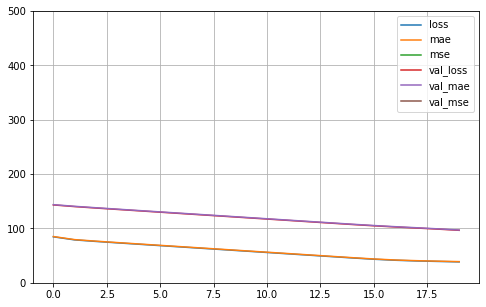

##################################################


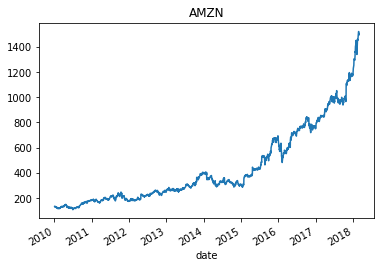

AMZN
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 279.8534 - mae: 280.3533 - mse: 94642.4141 - val_loss: 743.7053 - val_mae: 744.2053 - val_mse: 557662.4375
Epoch 2/20
1511/1511 [==============================] - 1s 345us/sample - loss: 274.9709 - mae: 275.4709 - mse: 91937.9609 - val_loss: 740.7793 - val_mae: 741.2792 - val_mse: 553315.8125
Epoch 3/20
1511/1511 [==============================] - 1s 338us/sample - loss: 272.2230 - mae: 272.7230 - mse: 90416.7422 - val_loss: 738.1585 - val_mae: 738.6584 - val_mse: 549437.1875
Epoch 4/20
1511/1511 [==============================] - 1s 340us/sample - loss: 269.6414 - mae: 270.1414 - mse: 89039.1328 - val_loss: 735.6083 - val_mae: 736.1083 - val_mse: 545676.1875
Epoch 5/20
1511/1511 [==============================] - 1s 340us/sample - loss: 267.1023 - mae: 267.6023 - mse: 87665.6641 - val_loss: 733.0784 - val_mae: 733.5784 - val_mse: 541958.0625
Epoch 6

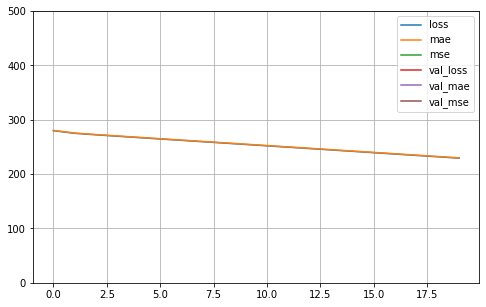

##################################################


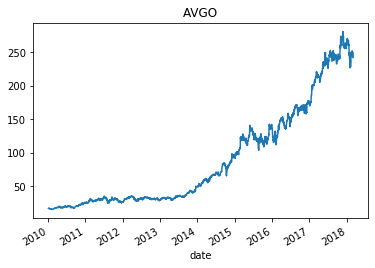

AVGO
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 46.2485 - mae: 46.7485 - mse: 3522.1558 - val_loss: 154.3829 - val_mae: 154.8829 - val_mse: 24253.1484
Epoch 2/20
1511/1511 [==============================] - 1s 353us/sample - loss: 41.9914 - mae: 42.4914 - mse: 3135.4153 - val_loss: 151.5204 - val_mae: 152.0204 - val_mse: 23374.6484
Epoch 3/20
1511/1511 [==============================] - 1s 345us/sample - loss: 39.2731 - mae: 39.7731 - mse: 2907.1296 - val_loss: 148.9132 - val_mae: 149.4132 - val_mse: 22588.7754
Epoch 4/20
1511/1511 [==============================] - 1s 351us/sample - loss: 36.7053 - mae: 37.2040 - mse: 2716.0547 - val_loss: 146.3758 - val_mae: 146.8758 - val_mse: 21836.9512
Epoch 5/20
1511/1511 [==============================] - 1s 354us/sample - loss: 34.3144 - mae: 34.8030 - mse: 2535.0056 - val_loss: 143.9911 - val_mae: 144.4911 - val_mse: 21142.1328
Epoch 6/20
1511/1511 [=====

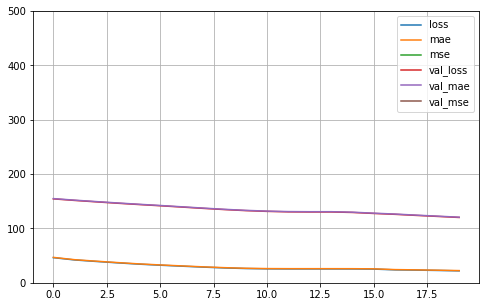

##################################################


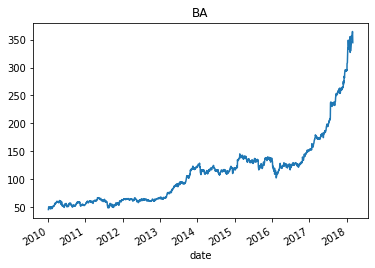

BA
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 81.5480 - mae: 82.0480 - mse: 7681.9175 - val_loss: 125.6221 - val_mae: 126.1221 - val_mse: 16096.2129
Epoch 2/20
1511/1511 [==============================] - 1s 339us/sample - loss: 76.9710 - mae: 77.4711 - mse: 6954.6934 - val_loss: 122.7307 - val_mae: 123.2307 - val_mse: 15375.2490
Epoch 3/20
1511/1511 [==============================] - 1s 332us/sample - loss: 74.2388 - mae: 74.7388 - mse: 6535.2383 - val_loss: 120.1161 - val_mae: 120.6161 - val_mse: 14737.6875
Epoch 4/20
1511/1511 [==============================] - 1s 331us/sample - loss: 71.6604 - mae: 72.1604 - mse: 6162.4810 - val_loss: 117.5677 - val_mae: 118.0677 - val_mse: 14129.4297
Epoch 5/20
1511/1511 [==============================] - 1s 333us/sample - loss: 69.1223 - mae: 69.6223 - mse: 5799.7783 - val_loss: 115.0386 - val_mae: 115.5386 - val_mse: 13538.6025
Epoch 6/20
1511/1511 [=======

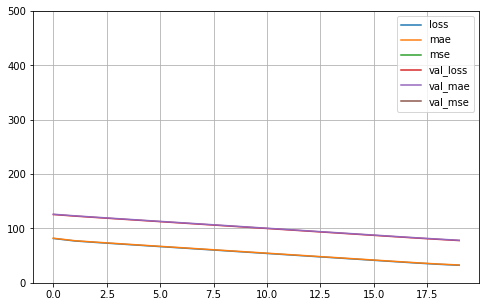

##################################################


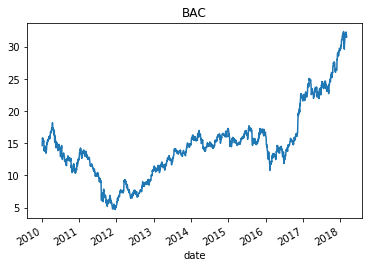

BAC
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 3s 2ms/sample - loss: 7.5691 - mae: 8.0612 - mse: 80.4239 - val_loss: 9.0758 - val_mae: 9.5758 - val_mse: 105.1969
Epoch 2/20
1511/1511 [==============================] - 1s 344us/sample - loss: 4.2421 - mae: 4.7251 - mse: 29.2704 - val_loss: 6.5969 - val_mae: 7.0969 - val_mse: 63.8712
Epoch 3/20
1511/1511 [==============================] - 1s 338us/sample - loss: 3.0165 - mae: 3.4974 - mse: 15.6132 - val_loss: 4.6620 - val_mae: 5.1603 - val_mse: 40.1344
Epoch 4/20
1511/1511 [==============================] - 1s 339us/sample - loss: 2.4839 - mae: 2.9539 - mse: 11.9591 - val_loss: 3.6208 - val_mae: 4.0839 - val_mse: 30.0032
Epoch 5/20
1511/1511 [==============================] - 1s 334us/sample - loss: 2.3680 - mae: 2.8347 - mse: 11.9217 - val_loss: 3.2302 - val_mae: 3.6815 - val_mse: 26.3594
Epoch 6/20
1511/1511 [==============================] - 1s 340us/sample - loss: 2.

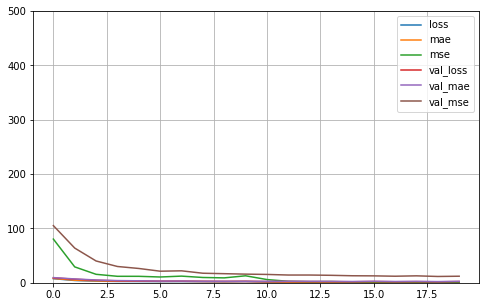

##################################################


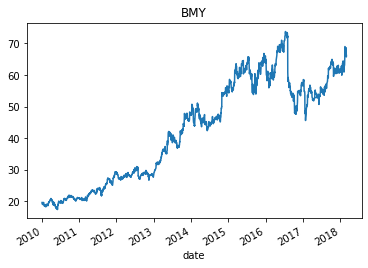

BMY
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 2s 2ms/sample - loss: 32.8589 - mae: 33.3589 - mse: 1326.0981 - val_loss: 51.4986 - val_mae: 51.9986 - val_mse: 2770.6011
Epoch 2/20
1511/1511 [==============================] - 1s 338us/sample - loss: 27.9508 - mae: 28.4508 - mse: 1024.1459 - val_loss: 48.2348 - val_mae: 48.7348 - val_mse: 2441.8311
Epoch 3/20
1511/1511 [==============================] - 0s 329us/sample - loss: 24.9762 - mae: 25.4762 - mse: 861.7311 - val_loss: 45.5230 - val_mae: 46.0230 - val_mse: 2184.8677
Epoch 4/20
1511/1511 [==============================] - 1s 338us/sample - loss: 22.3378 - mae: 22.8378 - mse: 737.3420 - val_loss: 42.9468 - val_mae: 43.4468 - val_mse: 1954.3730
Epoch 5/20
1511/1511 [==============================] - 1s 332us/sample - loss: 19.7837 - mae: 20.2827 - mse: 625.8607 - val_loss: 40.4137 - val_mae: 40.9137 - val_mse: 1740.6746
Epoch 6/20
1511/1511 [========================

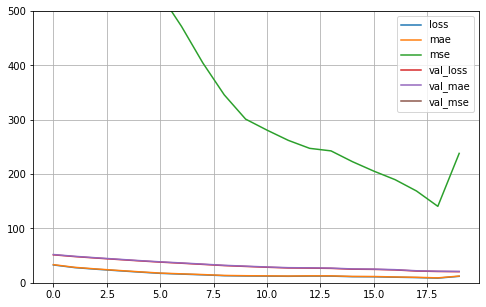

##################################################


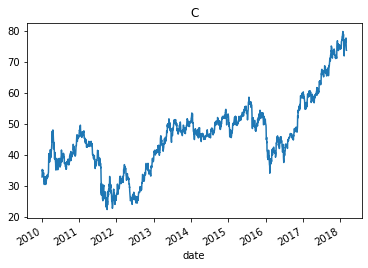

C
(2055,)
Train on 1511 samples, validate on 227 samples
Epoch 1/20
1511/1511 [==============================] - 2s 2ms/sample - loss: 36.1461 - mae: 36.6461 - mse: 1419.2639 - val_loss: 39.6738 - val_mae: 40.1738 - val_mse: 1653.6016
Epoch 2/20
1511/1511 [==============================] - 1s 345us/sample - loss: 32.2585 - mae: 32.7585 - mse: 1146.3184 - val_loss: 36.8375 - val_mae: 37.3375 - val_mse: 1433.7765
Epoch 3/20
1511/1511 [==============================] - 1s 336us/sample - loss: 29.5203 - mae: 30.0203 - mse: 973.7417 - val_loss: 34.1949 - val_mae: 34.6949 - val_mse: 1243.4287
Epoch 4/20
1511/1511 [==============================] - 0s 331us/sample - loss: 26.9272 - mae: 27.4272 - mse: 825.8282 - val_loss: 31.6399 - val_mae: 32.1399 - val_mse: 1072.6619
Epoch 5/20
1511/1511 [==============================] - 0s 325us/sample - loss: 24.3838 - mae: 24.8838 - mse: 692.2770 - val_loss: 29.1080 - val_mae: 29.6080 - val_mse: 916.3260
Epoch 6/20
1511/1511 [===========================

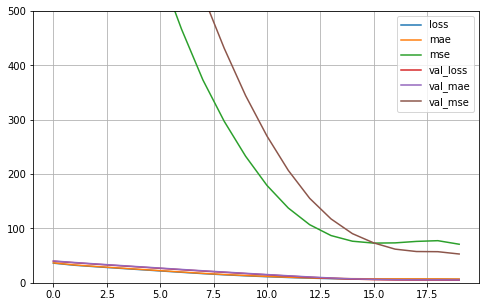

##################################################


In [15]:
model = two_layered_lstm()
training_loop(model)